## Question 1 - Refreshing Mathematics

### Part A:

Computing the gradient of $ f $ with respect to $ w $:

Definition of transposition of w:
$$ w = [w_1, ..., w_n]^T $$

Definition of gradient of f(w):
$$
\nabla f(w) = \begin{bmatrix}
           \frac{\partial f}{\partial w_1} \\
           \vdots \\
           \frac{\partial f}{\partial w_n}
         \end{bmatrix}
$$

$$
f(w) = a^T(w \cdot b) = [a_1~~a_2~~\dots~~a_n] = \begin{bmatrix}
           w_1b_1\\
           \vdots \\
           w_nb_n
         \end{bmatrix} = a_1b_1w_1 + \dots + a_nb_nw_n
$$

The gradient of f(w):
$$
\nabla f(w) = \begin{bmatrix}
           \frac{\partial f}{\partial w_1} \\
           \vdots \\
           \frac{\partial f}{\partial w_n}
         \end{bmatrix} = \begin{bmatrix}
           a_1b_1 \\
           \vdots \\
           a_nb_n
         \end{bmatrix} = a \cdot b
$$

### Part B:

Computing the gradient of $ f $ with respect to $ w $:

$$ w = [w_1, ..., w_n]^T $$

$$
\nabla f(w) = \begin{bmatrix}
           \frac{\partial f}{\partial w_1} \\
           \vdots \\
           \frac{\partial f}{\partial w_n}
         \end{bmatrix}
$$

Using cyclic trace property:
$$
f(w)=tr(Bww^TA) = tr(w^TBAw)
$$

The gradient of f(w):
$$
\nabla f(w) = ((AB)^T + AB)w
$$

### Part C:
Computing the Hessian of $f$ with respect to $w$:
$$
\nabla^2 f(w) = \begin{bmatrix}
           \frac{\partial}{\partial w_1 \partial w_1}f(w)~~\frac{\partial}{\partial w_1 \partial w_2}f(w)~~\dots~~\frac{\partial}{\partial w_1 \partial w_n}f(w) \\
           \vdots~~~~~~~~~~~~~~~~~~~~\vdots~~~~~~~~~~~~~~~\ddots~~~~~~~~~~\vdots \\
           \frac{\partial}{\partial w_n \partial w_1}f(w)~~\frac{\partial}{\partial w_n \partial w_2}f(w)~~\dots~~\frac{\partial}{\partial w_n \partial w_n}f(w)
         \end{bmatrix}
$$

From Part B:
$$
\nabla f(w) = ((AB)^T + AB)w
$$

The Hessian of f(w):
$$
\nabla^2 f(w) = (AB)^T + AB
$$

### Part D:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 1], [1, -1]])
B = np.array([[2, -1], [-1, 3]])
w = np.array([[1], [1]])

# Calculating f(w)
def f(w, A, B):
    return np.trace(B @ w @ w.T @ A)

# Determine if f(w) is convex or not
def is_convex(w, A, B):
    return np.all(np.linalg.eigvals(A @ w @ w.T @ B) > 0)

# Print out if f(w) is convex or not
if is_convex(w, A, B):
    print("f(w) is a convex function")
else:
    print("f(w) is not a convex function")

f(w) is not a convex function


### Part E:
Computing the gradient of $ f $ with respect to $ w $:

$$
f(w) =
    log\Bigl( \frac{1}{1+e^{-w^Tx}}\Bigr)
$$

$$ 
\nabla f(w) = log(\sigma(a)(1 - sigma(a))) = log(\sigma(w^Tx)(1 - \sigma(w^Tx)))
$$

The gradient f(w):
$$
\nabla f(w) = \frac{1}{\sigma(w^Tx)(1 - \sigma(w^Tx))}
$$

## Question 2 - Linear and Polynomial Regression

### Part A:

In [2]:
# Loading Data
import pandas as pd
trainingX = pd.read_csv('hw1xtr.dat', header=None)
trainingY = pd.read_csv('hw1ytr.dat', header=None)
testX = pd.read_csv('hw1xte.dat', header=None)
testY = pd.read_csv('hw1yte.dat', header=None)

Text(0, 0.5, 'Y')

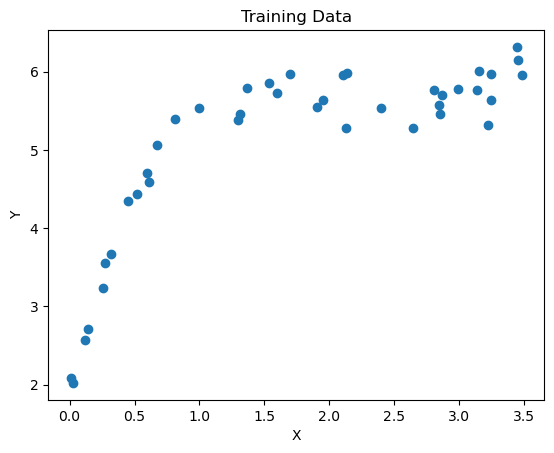

In [3]:
# Plotting Training Data
plt.scatter(trainingX, trainingY)
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

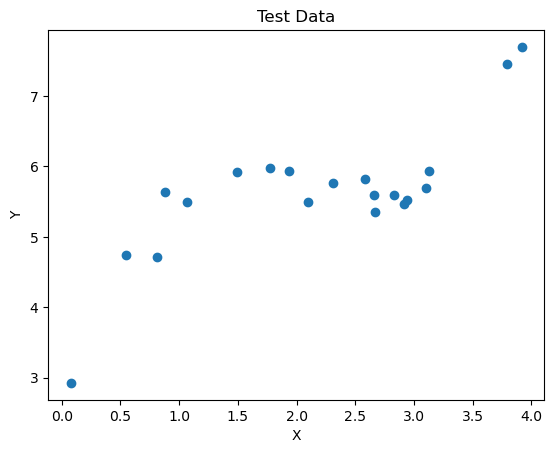

In [4]:
# Plotting Test Data
plt.scatter(testX, testY)
plt.title('Test Data')
plt.xlabel('X')
plt.ylabel('Y')

#### Part B:

In [5]:
# Regression Method
def regression(X, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

# Average Error Method
def averageError(X, Y, w):
    return 1/len(X) * np.sum((np.dot(X, w) - Y)**2)

# Plotting Method
def plot_data(X, Y, x, regressionLine, title):
    plt.scatter(X, Y)
    plt.plot(x, regressionLine, color='red')
    plt.title(title)
    plt.legend(['Data', 'Regression Line'])
    plt.xlabel('X')
    plt.ylabel('Y')

Average Error on Training Data:  0    0.508589
dtype: float64


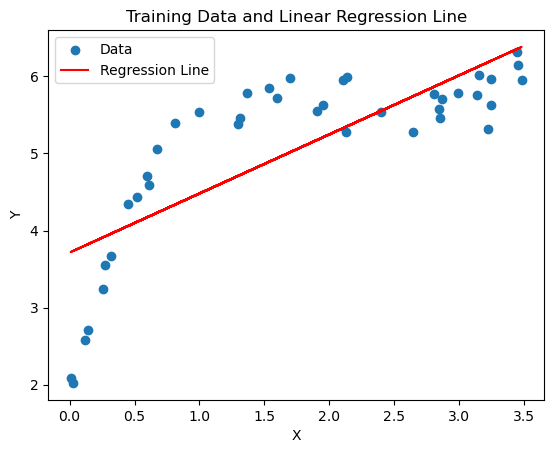

In [6]:
# Add Column Vector of 1's to Features
trainingXLR = pd.concat([pd.Series(1, index=trainingX.index, name='00'), trainingX], axis=1)
testXLR = pd.concat([pd.Series(1, index=testX.index, name='00'), testX], axis=1)

# Linear Regression
w = regression(trainingXLR, trainingY)
y = w[1]*trainingX + w[0]

# Plotting Linear Regression & Training Data
plot_data(trainingX, trainingY, trainingX, y, 'Training Data and Linear Regression Line')

# Reporting Average Error
print("Average Error on Training Data: ", averageError(trainingXLR, trainingY, w))


### Part C:

Average Error on Test Data:  0    0.443912
dtype: float64


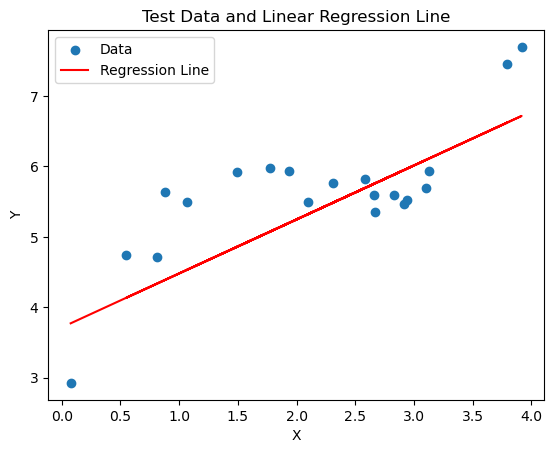

In [7]:
# Plotting Linear Regression & Test Data
y = w[1]*testX + w[0]
plot_data(testX, testY, testX, y, 'Test Data and Linear Regression Line')

# Report average error on test data
print("Average Error on Test Data: ", averageError(testXLR, testY, w))

#### Part D:

Average Error on Training Data (2nd-Order Polynomial Regression):  0    0.200985
dtype: float64


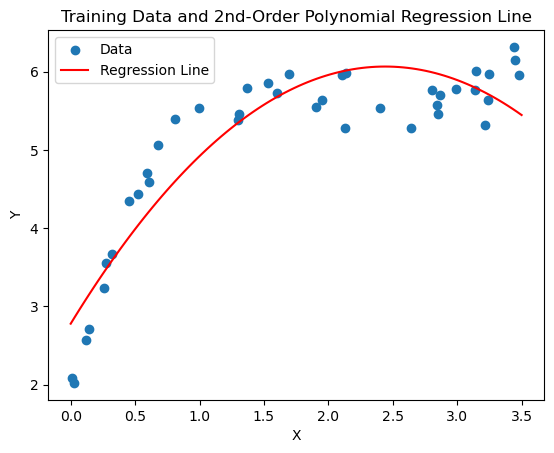

In [8]:
# Add new feature x^2 to the training and test data
trainingX2 = trainingX**2
testX2 = testX**2
trainingXLR2 = pd.concat([trainingXLR, trainingX2], axis=1)
testXLR2 = pd.concat([testXLR, testX2], axis=1)

# Perform 2nd-order polynomial regression on new data
w2 = regression(trainingXLR2, trainingY)

# Plotting 2nd-Order Polynomial Regression & Training Data
x = np.linspace(0, 3.5, 100)
y = w2[2]*x**2 + w2[1]*x + w2[0]
plot_data(trainingX, trainingY, x, y, 'Training Data and 2nd-Order Polynomial Regression Line')

# Report average error on training data
print("Average Error on Training Data (2nd-Order Polynomial Regression): ", averageError(trainingXLR2, trainingY, w2))

Average Error on Test Data (2nd-Order Polynomial Regression):  0    0.853263
dtype: float64


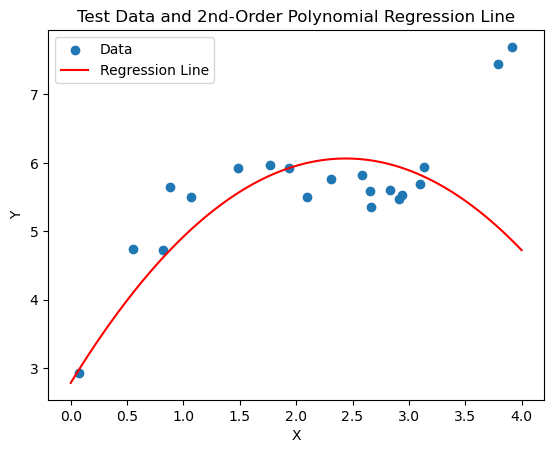

In [9]:
# Plot the 2nd-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w2[2]*x**2 + w2[1]*x + w2[0]
plot_data(testX, testY, x, y, 'Test Data and 2nd-Order Polynomial Regression Line')

# Report average error on training data
err = averageError(testXLR2, testY, w2)
print("Average Error on Test Data (2nd-Order Polynomial Regression): ", err)

##### What's Better? Linear vs. 2nd-order
It is better to fit the linear regression line over the 2nd-order regression line in this case. While the training error is significantly better on the 2nd-order example, the test data is much worse with 0.85 average error compared to 0.44 average error in the linear case.

### Part E:

Average Error on Training Data (3rd-Order Polynomial Regression):  0    0.039229
dtype: float64


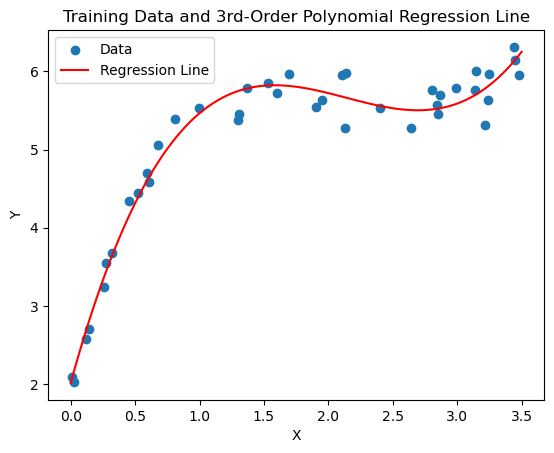

In [10]:
# Add new feature x^3 to the training and test data
trainingX3 = trainingX**3
testX3 = testX**3
trainingXLR3 = pd.concat([trainingXLR2, trainingX3], axis=1)
testXLR3 = pd.concat([testXLR2, testX3], axis=1)

# Perform 3rd-order polynomial regression on new data
w3 = regression(trainingXLR3, trainingY)

# Plot the 3rd-order polynomial regression line
x = np.linspace(0, 3.5, 100)
y = w3[3]*x**3 + w3[2]*x**2 + w3[1]*x + w3[0]
plot_data(trainingX, trainingY, x, y, 'Training Data and 3rd-Order Polynomial Regression Line')

# Report average error on training data
print("Average Error on Training Data (3rd-Order Polynomial Regression): ", averageError(trainingXLR3, trainingY, w3))

Average Error on Test Data (3rd-Order Polynomial Regression):  0    0.056418
dtype: float64


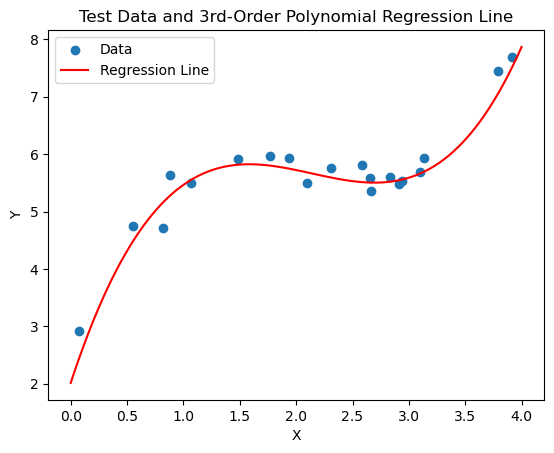

In [11]:
# Plot the 3rd-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w3[3]*x**3 + w3[2]*x**2 + w3[1]*x + w3[0]
plot_data(testX, testY, x, y, 'Test Data and 3rd-Order Polynomial Regression Line')

# Report average error on test data
print("Average Error on Test Data (3rd-Order Polynomial Regression): ", averageError(testXLR3, testY, w3))

##### What's Better? Linear vs. 3rd-order Polynomial Regression
The 3rd-order polynomial regression is a better fit than the linear regression.

For the training data, the average error is 0.039 compared to 0.508 for linear regression.

For the test data, the average error is 0.056 compared to 0.444 for linear regression.

### Part F:

Average Error on Training Data (4th-Order Polynomial Regression):  0    0.035645
dtype: float64


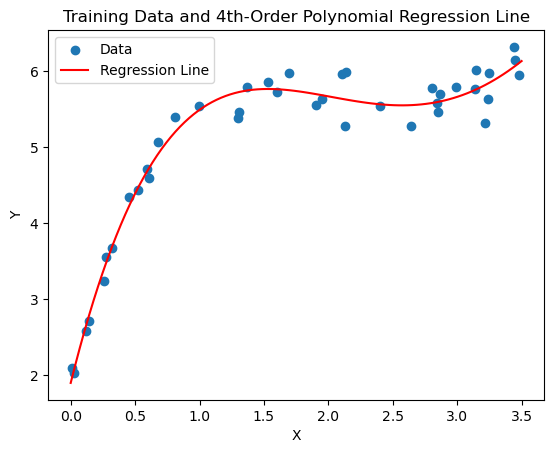

In [12]:
# Add new feature x^4 to the training and test data
trainingX4 = trainingX**4
testX4 = testX**4
trainingXLR4 = pd.concat([trainingXLR3, trainingX4], axis=1)
testXLR4 = pd.concat([testXLR3, testX4], axis=1)

# Perform 4th-order polynomial regression on new data
w4 = regression(trainingXLR4, trainingY)

# Plot the 4th-order polynomial regression line
x = np.linspace(0, 3.5, 100)
y = w4[4]*x**4 + w4[3]*x**3 + w4[2]*x**2 + w4[1]*x + w4[0]
plot_data(trainingX, trainingY, x, y, 'Training Data and 4th-Order Polynomial Regression Line')

# Report average error on training data
print("Average Error on Training Data (4th-Order Polynomial Regression): ", averageError(trainingXLR4, trainingY, w4))

Average Error on Test Data (4th-Order Polynomial Regression):  0    0.127222
dtype: float64


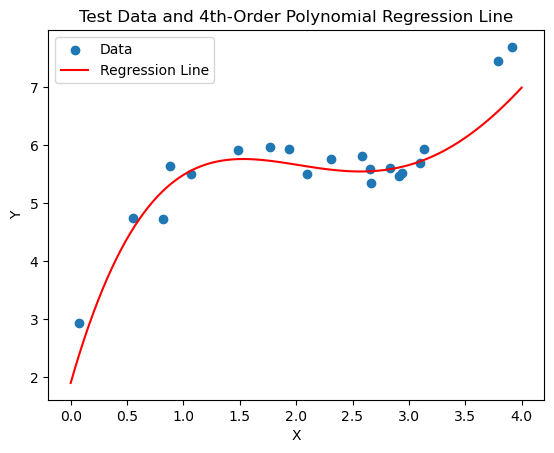

In [13]:
# Plot the 4th-order polynomial regression line
x = np.linspace(0, 4, 100)
y = w4[4]*x**4 + w4[3]*x**3 + w4[2]*x**2 + w4[1]*x + w4[0]
plot_data(testX, testY, x, y, 'Test Data and 4th-Order Polynomial Regression Line')

# Report average error on test data
print("Average Error on Test Data (4th-Order Polynomial Regression): ", averageError(testXLR4, testY, w4))

### What's Best?

Linear Regression:
- 0.509 training error
- 0.444 test error

2nd-Order:
- 0.201 training error
- 0.853 test error

3rd-Order:
- 0.039 training error
- 0.056 test error

4th-Order:
- 0.036 training error
- 0.127 test error

From the data we have, both the third-order and fourth-order solutions are similar and ideal for fitting the data. Overall, the 3rd-order solution would be best as it has the lowest error on the test data, and seems to be better than the 4th-order, since it is likely overfitting the training data to a decent degree, causing it to have a worse test error than 3rd-order.

## Question 3 - Regularization and Cross-Validation

### Part A:

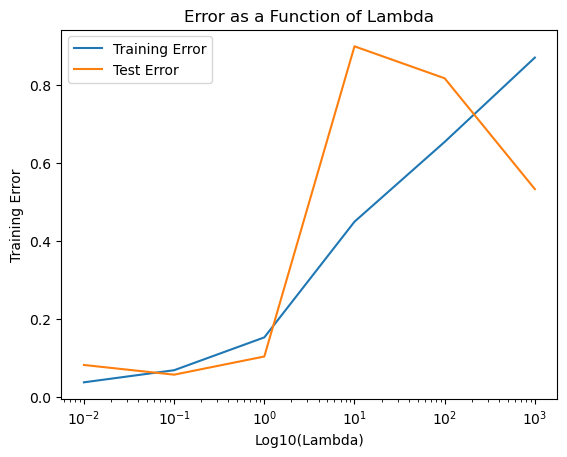

In [14]:
# L2 Regularization Method - w = (X_T*X + lI)^-1 * X_T*Y. w0 is not affected by regularization
def l2_regularization(X, Y, l):
    I = np.identity(X.shape[1])
    I[0, 0] = 0
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + l*I), X.T), Y)

# Perform 4th-order polynomial regression with L2 regularization for l = {0.01; 0.1'; 1; 10; 100}
l = [0.01, 0.1, 1, 10, 100, 1000]
training_errors = []
for i in l:
    w = l2_regularization(trainingXLR4, trainingY, i)
    training_errors.append(averageError(trainingXLR4, trainingY, w))

# Test data
    test_errors = []
for i in l:
    w = l2_regularization(trainingXLR4, trainingY, i)
    test_errors.append(averageError(testXLR4, testY, w))

# Plot the training and test error as a function of lambda (log10 scale for lambda)
plt.plot(l, training_errors)
plt.plot(l, test_errors)
plt.title('Error as a Function of Lambda')
plt.xlabel('Log10(Lambda)')
plt.ylabel('Training Error')
plt.xscale('log')
plt.legend(['Training Error', 'Test Error'])

#### Best Lambda:
$ \lambda = 0.01 $ is the best for both fitting the training data and the test data, as the error is minimized this way.

### Part B:

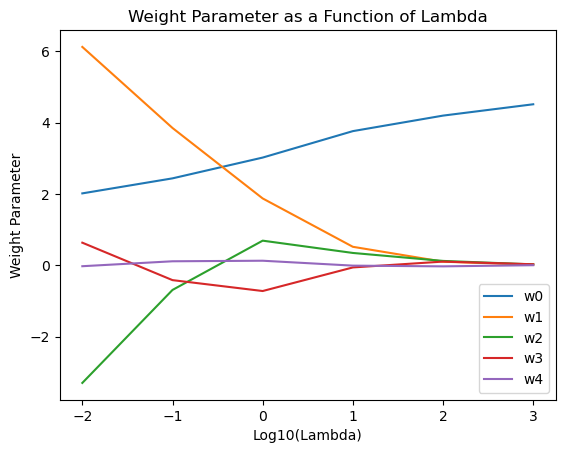

In [15]:
# Plot the value of each weight parameter (w_0...w_4) as a function of lambda
weights = []
for i in l:
    w = l2_regularization(trainingXLR4, trainingY, i)
    weights.append(w)

# Plot the value of each weight parameter (w_0...w_4) as a function of lambda
weights = np.array(weights)
for i in range(5):
    plt.plot(np.log10(l), weights[:, i])
plt.title('Weight Parameter as a Function of Lambda')
plt.xlabel('Log10(Lambda)')
plt.ylabel('Weight Parameter')
plt.legend(['w0', 'w1', 'w2', 'w3', 'w4'])

### Part C:

Text(0, 0.5, 'Cross-Validation Error (J)')

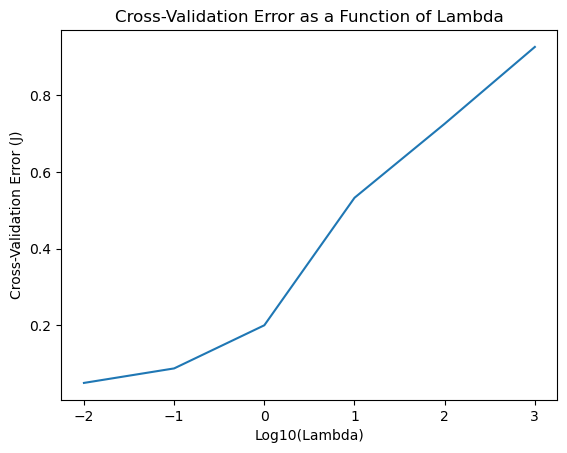

In [16]:
# Five-Fold Cross Validation Method
def five_fold_cross_validation(X, Y, l):
    # Randomly split training data into 5 groups
    np.random.seed(0)
    indices = np.random.permutation(X.shape[0])
    X = X.iloc[indices]
    Y = Y.iloc[indices]
    X = np.array_split(X, 5)
    Y = np.array_split(Y, 5)

    # Perform 5-fold cross validation
    errors = []
    for i in range(5):
        X_train = np.concatenate(X[:i] + X[i+1:])
        Y_train = np.concatenate(Y[:i] + Y[i+1:])
        X_test = X[i]
        Y_test = Y[i]
        w = l2_regularization(X_train, Y_train, l)
        errors.append(averageError(X_test, Y_test, w))
    return np.mean(errors)

# Perform 5-fold cross validation for l = {0.01; 0.1; 1; 10; 100}
cross_validation_errors = []
for i in l:
    cross_validation_errors.append(five_fold_cross_validation(trainingXLR4, trainingY, i))

# Plot the cross-validation error as a function of lambda (log10 scale for lambda)
plt.plot(np.log10(l), cross_validation_errors)
plt.title('Cross-Validation Error as a Function of Lambda')
plt.xlabel('Log10(Lambda)')
plt.ylabel('Cross-Validation Error (J)')


Ideal Lambda:  0.01


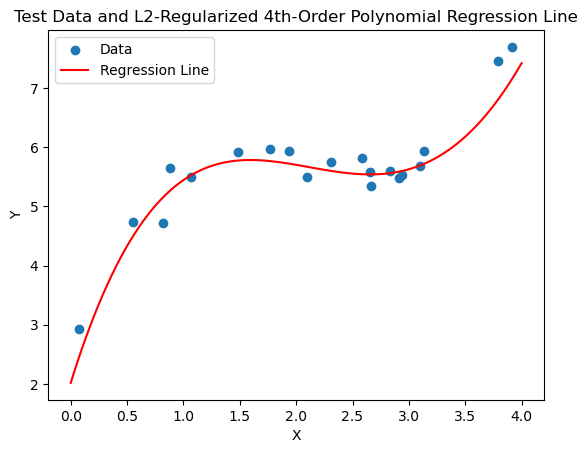

In [17]:
# Plot the test data and the l2-regularized 4th-order polynomial regression line from cross validation
ideal_lambda = l[np.argmin(cross_validation_errors)]
w = l2_regularization(trainingXLR4, trainingY, ideal_lambda)
x = np.linspace(0, 4, 100)
y = w[4]*x**4 + w[3]*x**3 + w[2]*x**2 + w[1]*x + w[0]
plot_data(testX, testY, x, y, 'Test Data and L2-Regularized 4th-Order Polynomial Regression Line')

print("Ideal Lambda: ", ideal_lambda)

#### Best Lambda
The best lambda value is 0.01. This is the same as Part A.

The plot above showcases the regression for the cross-validation procedure with lambda = 0.01. Comparing this to the test data without regularization, it is evidently a better fit than it.